# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1) 

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [14]:
# K-means with Abalone
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans


# get data
abaloneData = arff.loadarff('abalone.arff')

# put data into a data frame
abaloneDataFrame = pd.DataFrame(abaloneData[0])

clf = KMeans(n_clusters=3, init='random', n_init=1)

clf.fit(abaloneDataFrame)

print('Labels: ', clf.labels_, '\n')
print('Cluster centers: ', clf.cluster_centers_, '\n')
print('Number of Iterations to converge: ', clf.n_iter_, '\n')
print('Total sum squared error of each point from its cluser center: ', clf.inertia_, '\n')
print('Total average solhouette score: ', silhouette_score(abaloneDataFrame, clf.labels_), '\n')

Labels:  [0 2 2 1 2 2 0 0 2 0 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 0 1 1 0 0 0 1 2 0
 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 0 1
 1 0 2 1 1 1 2 1 0 0 1 1 1 1 2 1 0 1 1 1 0 1 2 2 2 1 2 0 0 1 1 1 1 1 2 2 2
 2 2 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 2
 2 2 0 2 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 2 2 2 2 2 2 2 2 1 1 0 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 0 0 1] 

Cluster centers:  [[ 0.61366667  0.48933333  0.16716667  1.29283333  0.48815     0.25873333
   0.45488333 17.06666667]
 [ 0.56078652  0.44050562  0.15308989  0.94596067  0.37410112  0.20873596
   0.30108989 11.49438202]
 [ 0.40975309  0.31709877  0.10277778  0.39740741  0.16626543  0.09267284
   0.12505556  7.55555556]] 

Number of Iterations to converge:  4 

Total sum squared error of each point from its cluser center:  512.9856925785199 

Total average solhouette score:  0.5014855438589172 



**Discussion:**  

In the above cell, I ran a K-Means classifier with the parameters n_clusters=3, init='random', and n_init=1. The K-Means classifier, chooses n_clusters number of centroid points (in this case 3), and will group each point into the cluster of the nearest centroid point. Then, after grouping all points, the K-Means algorithm with recalculate the centroid point, then regroup all points accordingly. This process of calculating a centroid, then regrouping points into the group of the nearest centroid repeats until the centroids stop moving.  

After running the K-Means classifier on this dataset, I output the following information:  
1. Labels. First, I output the labels expected by the K-Means algorithm:  

[0 2 2 1 2 2 0 0 2 0 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 0 1 1 0 0 0 1 2 0  
 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 0 1  
 1 0 2 1 1 1 2 1 0 0 1 1 1 1 2 1 0 1 1 1 0 1 2 2 2 1 2 0 0 1 1 1 1 1 2 2 2  
 2 2 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 2  
 2 2 0 2 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 2 2 2 2 2 2 2 2 1 1 0 1 1 1  
 1 1 1 1 2 1 1 1 2 1 1 1 0 0 1]    

This list is the cluster group (0, 1, or 2) for each point.  


2. Cluster Centers. The next thing I output from the K-Means algorithm is the Cluster Centers:  

[  
    [ 0.61366667  0.48933333  0.16716667  1.29283333  0.48815     0.25873333 0.45488333 17.06666667],  
    [ 0.56078652  0.44050562  0.15308989  0.94596067  0.37410112  0.20873596 0.30108989 11.49438202],  
    [ 0.40975309  0.31709877  0.10277778  0.39740741  0.16626543  0.09267284 0.12505556  7.55555556]  
]    

This output that you can see above provides the final coordinates of each cluster center. As expected, because there are 3 clusters, there are 3 centroid points output by the clf.cluster_centers_ attribute.   


3. Number of Iterations to converge: 4. This attribute, given by clf.n_iter_ tells us the number of times centroids were recalculated and instances regrouped before convergence (aka. centeroids stopped moving) occurred. In this case, it took 4 recalculations to converge.  


4. Total sum squared error of each point from its cluser center: 512.9856925785199. This value, given by clf.inertia_, is a measure of how close each point is to its cluster center. A small value here would mean that all points are very close to their final centroid point. A large value signals that each point is very far from its centroid point.  


5. Total average silhouette score: 0.5014855438589172. Silhouette score is an indication of 2 things. First, how closely grouped clusters are. And second, how distant clusters are from one another. This score will be between -1 and 1, where the closer the value is to one, the better the score.  

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC) 

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [4]:
# HAC with Abalone
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
abaloneData = arff.loadarff('abalone.arff')

# put data into a data frame
abaloneDataFrame = pd.DataFrame(abaloneData[0])

clf = AgglomerativeClustering(linkage='complete', n_clusters=3)

clf.fit(abaloneDataFrame)

print('Labels: ', clf.labels_, '\n')
print('Average Silhouette Score: ', silhouette_score(abaloneDataFrame, clf.labels_), '\n')

Labels:  [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0] 

Average Silhouette Score:  0.5398112398376158 



**Discussion**  

Hierarchical Agglomerative Clustering is a proccess of unsupervised learning where each datapoint is individually considered its own cluster, then iteratively, the closest clusters are merged until n_clusters remain.  

Specifically, in this HAC (above), I clustered with complete linkage. This means that the distance between clusters was measured by the distance between the two furthest points between any two given clusters.  

Further, in this HAC I set n_clusters equal to 3. That means that the model continued merging closest clusters until 3 remained.  

After training the model with the abalone dataset, I output two pieces of information. First, I output the labels. The list output by this represents the group each datapoint was placed in, either 0, 1, or 2. Second, I also output the Average Silhouette Score. As was described in the previous discussion, this score provides a measure of how closely grouped each cluster is, and also a measure of how distant clusters are from one another. These scores range from -1 to 1, where the closer the score is to 1, the better.  


## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
irisDataFrame.drop(columns='class', inplace=True)

for i in range(5):

    clf = KMeans(n_clusters=4, init='random', n_init=1)

    clf.fit(irisDataFrame)

    print('iter', i+1, clf.inertia_)
    print('silhouette score', silhouette_score(irisDataFrame, clf.labels_))


iter 1 57.47327326549492
silhouette score 0.4951199955302151
iter 2 57.31787321428571
silhouette score 0.4978256901095472
iter 3 71.34044682436699
silhouette score 0.41710505992648145
iter 4 57.47327326549492
silhouette score 0.4951199955302151
iter 5 71.66131466733202
silhouette score 0.4123774733089941


**Results and Discussion:**  

| Run | Inertia | Silhouette |
| --- | --- | --- |
| 1 | 57.47327326549492 | 0.4951199955302151 |
| 2 | 57.31787321428571 | 0.4978256901095472 |
| 3 | 71.34044682436699 | 0.41710505992648145 |
| 4 | 57.47327326549492 | 0.4951199955302151 |
| 5 | 71.66131466733202 | 0.4123774733089941 |  

As you can see from this table, I followed the directions provided by the first bullet point and ran the K-Means model 5 times, each time outputting the Inertia and Silhouette values for that run.  

Inertia is a measure of how well the data fits the clusters. To obtain the inertia value, the model sums the squared distances from each point to its centroid. That being said, a lower inertia value is better because it means that the clusters are tightly grouped points. Considering the output of my model over five iterations, I found that the inertia value seems the jump between about 57 and 71. After considering why this might be, I decided that it is likely because different initial centroids will create different final clusterings. Depending on where the centroids start, the final clusterings are likely different. While different, many of these final clusterings are probably similar and thus have similar inerita values. As you can see above, there are likely 2 clusterings most likely, which have inertia values of 57 and 71.  

As discussed above, Silhouette is a measure of how tightly grouped each cluster is and how close clusters are to one another. Similar to inertia, the values jumped from either 0.49 or 0.41. Interestingly, these values coorelated with inertia values of 57 and 71 respectively. This makes sense because inertia and silhouette both are measures of how tightly the centers are grouped, so a higher inertia value (bad), likely is related to a low solhouette value (bad) and vice versa.  

Considering what these values teach us, their outputs on this dataset make sense.


In [20]:
# K-means initial centroid experiments
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
irisDataFrame.drop(columns='class', inplace=True)

for i in range(5):

    clf = KMeans(n_clusters=4, init='random', n_init=5)

    clf.fit(irisDataFrame)

    print('iter', i+1, clf.inertia_)
    print('silhouette score', silhouette_score(irisDataFrame, clf.labels_))

iter 1 57.31787321428571
silhouette score 0.4978256901095472
iter 2 57.47327326549492
silhouette score 0.4951199955302151
iter 3 57.31787321428571
silhouette score 0.4978256901095472
iter 4 57.345409315718165
silhouette score 0.4972279726640147
iter 5 57.345409315718165
silhouette score 0.4972279726640147


**Results and Discussion:**  

| Run | Inertia | Silhouette |
| --- | --- | --- |
| 1 | 57.31787321428571 | 0.4978256901095472 |
| 2 | 57.47327326549492 | 0.4951199955302151 |
| 3 | 57.31787321428571 | 0.4978256901095472 |
| 4 | 57.345409315718165 | 0.4972279726640147 |
| 5 | 57.345409315718165 | 0.4972279726640147 |  

In a run of the above code cell, I got the output shown in the above table. In this run, I set n_init equal to 5. That means, that the model would run 5 times with randomized centroids and return the data for the run with the best inertia value. Observing the data output (the table above), this makes sense. Earlier when I had n_init=1, the inertia values varied between 57 and 71. However, in this run when n_init=5, the inertia values were much more constant, all at about 57, a better inertia value. I think that these results make sense because over 5 runs for each iteration, you are very likely to get a better value for each iteration. Finally, when all these inertia values are compared, you are likely to have way better results accross the board because it is much more likely that each iteration returns better inerta values.  



In [32]:
# K-means initial centroid experiments
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
irisDataFrame.drop(columns='class', inplace=True)

for i in range(5):

    clf = KMeans(n_clusters=4, n_init=1, init='k-means++')

    clf.fit(irisDataFrame)

    print('iter', i+1, clf.inertia_)
    print('silhouette score', silhouette_score(irisDataFrame, clf.labels_))

iter 1 57.47327326549492
silhouette score 0.4951199955302151
iter 2 57.37175929288104
silhouette score 0.49595535840401567
iter 3 57.31787321428571
silhouette score 0.4978256901095472
iter 4 71.66131466733202
silhouette score 0.4123774733089941
iter 5 57.47327326549492
silhouette score 0.4951199955302151


**Results and Discussion:**  

| Run | Inertia | Silhouette |
| --- | --- | --- |
| 1 | 57.47327326549492 | 0.4951199955302151 |
| 2 | 57.37175929288104 | 0.49595535840401567 |
| 3 | 57.31787321428571 | 0.4978256901095472 |
| 4 | 71.66131466733202 | 0.4123774733089941 |
| 5 | 57.47327326549492 | 0.4951199955302151 |  

In the run of the above code cell, I recieved the information provided by the above table as output. In this code cell, the main difference is that I set init = 'K-Means++'. 'K-Means++' helps improve the k means algorithm by running a quick initial (but likely less accurate) version of k means to get decent centroids to begin. I know that this improved by overall results because generally, compared to the first 5 runs (two code cells above) I got lower (better) inertia values.  

It makes sense that these inertia values would be better because their initial centroids were better than the random points I was originally using. By running a quick, initial version of k means, the model gets better starting centroids and will generally get better results.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

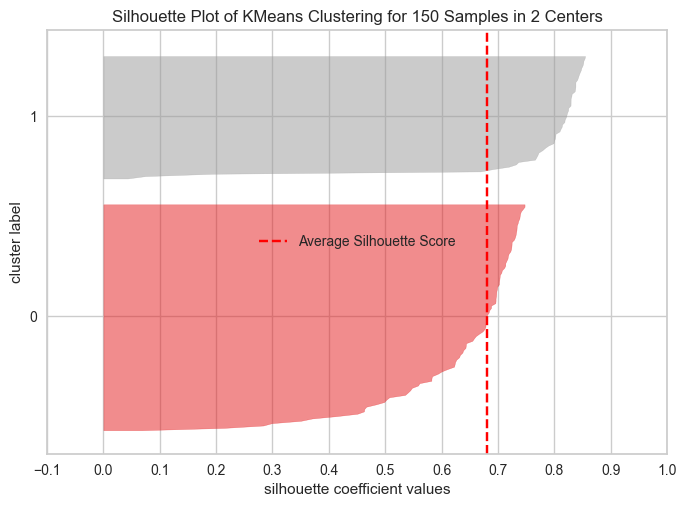

inertia:  152.36870647733906
silhouette score:  0.6808136202936816


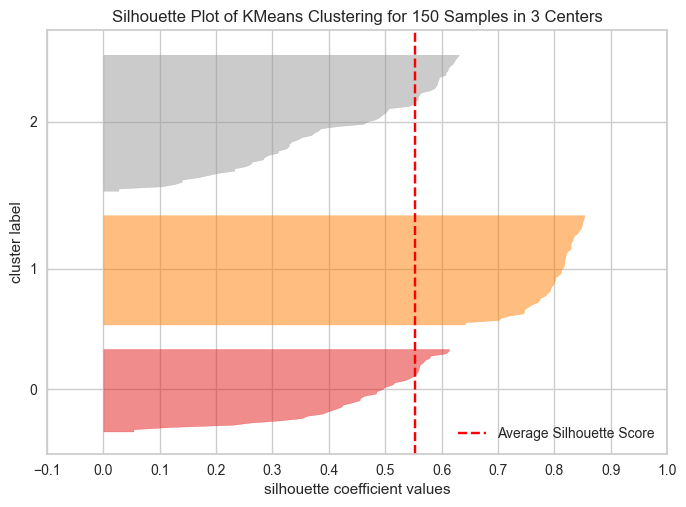

inertia:  78.94084142614602
silhouette score:  0.5525919445499757


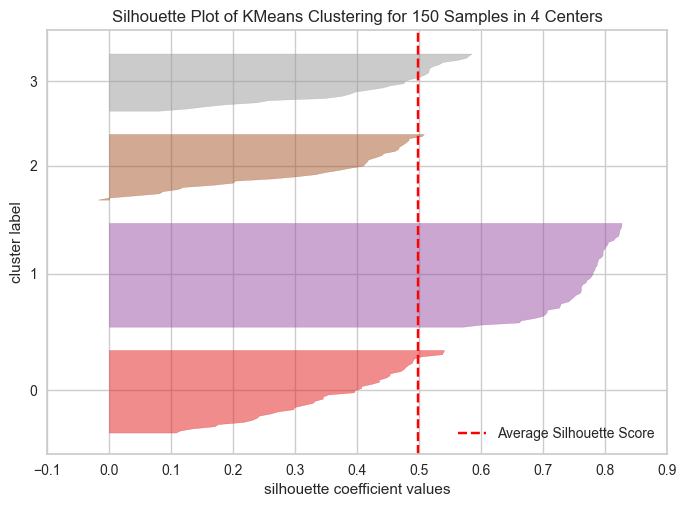

inertia:  57.31787321428571
silhouette score:  0.4978256901095472


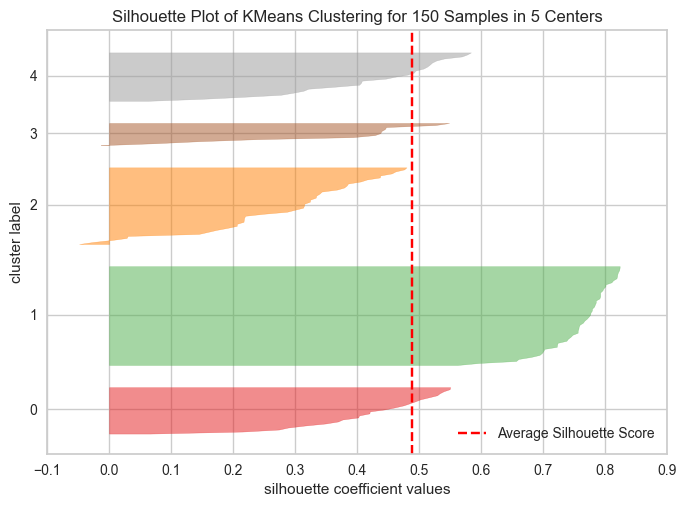

inertia:  46.535582051282056
silhouette score:  0.4885175508886279


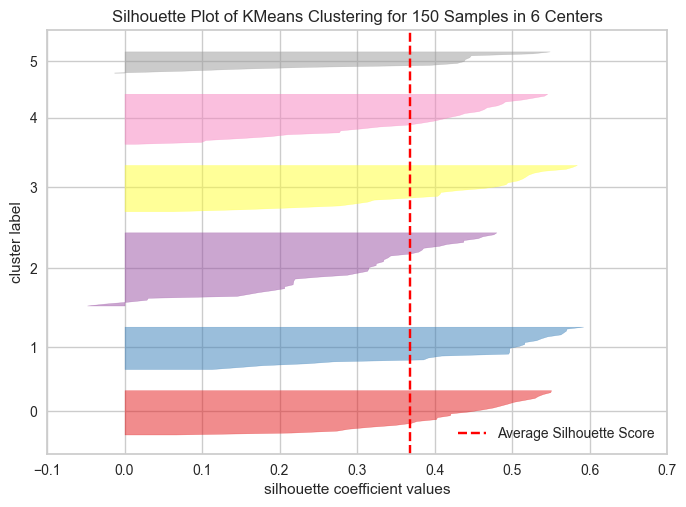

inertia:  38.930963049671746
silhouette score:  0.36820569682713084


In [3]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
irisDataFrame.drop(columns='class', inplace=True)

for k in range(2, 7):

    clf = KMeans(n_clusters=k, n_init=10, init='k-means++')
    visualizer = SilhouetteVisualizer(clf)

    visualizer.fit(irisDataFrame)
    visualizer.show()

    print('inertia: ', clf.inertia_)
    print('silhouette score: ', silhouette_score(irisDataFrame, clf.labels_))

Discuss your results and justify which clustering is best based on the silhouette graphs  

**Discussion:**  
Considering the above visualizations and my previous discussions, I would suggest that the best number of centers is 3. I suggest a value of 3 because it strikes a better balance between LOW inertia and HIGH solhouette. In addition to these considerations, a good k means grouping will have silhouette clusters that are reletively flat on the right and and suddenly drop off. Further, a clustering of three groups has no negative silhouette values.  

With three centers, the inertia value is 78.94084142614602 and the silhouette score is 0.5525919445499757. Further, at three clusters, the silhouette groupings are pretty good, they have lots of long lines, and drop off relatively quickly from the highest value. If I were to drop to only two clusters, then the inertia value would double. Meanwhile if I increase to four centers, my silhouette score drops by 0.07 to the second lowest value of all groupings. Further, the shaping of the groupings in the visualizations get much worse, they are peaked with a long dropoff and low values. For these reasons, I consider three clusters to be the optimal value because it provides a reletively LOW inertia, HIGH silhouette, and has no negative silhouette values. While this decision may change in different circumstances for different needs, given these visualizations, I would suggest 3 clusters.   


## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
irisDataFrame.drop(columns='class', inplace=True)


for k in range(2, 7):
    for link in ['single', 'average', 'complete', 'ward']:

        clf = AgglomerativeClustering(linkage=link, n_clusters=k)
        clf.fit(irisDataFrame)

        print('k', k, 'link', link, 'score', silhouette_score(irisDataFrame, clf.labels_), '\n')


k 2 link single score 0.6863930543445408 

k 2 link average score 0.6863930543445408 

k 2 link complete score 0.5160600757054667 

k 2 link ward score 0.6863930543445408 

k 3 link single score 0.5118387098922373 

k 3 link average score 0.5539343898551251 

k 3 link complete score 0.5133502348448076 

k 3 link ward score 0.5540972908150551 

k 4 link single score 0.28177774044073334 

k 4 link average score 0.47166531675930673 

k 4 link complete score 0.49957411494308457 

k 4 link ward score 0.4887398491004217 

k 5 link single score 0.28348367281231884 

k 5 link average score 0.43034168221413677 

k 5 link complete score 0.3499977113935896 

k 5 link ward score 0.4841553526240121 

k 6 link single score 0.22111441158801626 

k 6 link average score 0.34065865237555976 

k 6 link complete score 0.34205174735616756 

k 6 link ward score 0.3618845152256815 



**Discussion and linkage comparison**  

| K Clusters | Single Link | Average Link | Complete Link | Ward Link |
| --- | --- | --- | --- | --- |
| 2 | 0.6863930543445408 | 0.6863930543445408 | 0.5160600757054667 | 0.6863930543445408 |
| 3 | 0.5118387098922373 | 0.5539343898551251 | 0.5133502348448076 | 0.5540972908150551 |
| 4 | 0.28177774044073334 | 0.47166531675930673 | 0.49957411494308457 | 0.4887398491004217 |
| 5 | 0.28348367281231884 | 0.43034168221413677 | 0.3499977113935896 | 0.4841553526240121 |
| 6 | 0.22111441158801626 | 0.34065865237555976 | 0.34205174735616756 | 0.3618845152256815 |  

In this cell, I ran the HAC algorithm with n_clusters=2-6 and for each number of clusters, I experimented with all four linkage measurements (single Link, average link, complete link, and ward link). For each combination of number of clusters and linkage method, I reported the silhouette score.  

Interestingly, the silhouette score was generally at its highest at k=2 and as k increased, the silhouette score decreased. I think that this is likely because with more clusters, the space between clusters shrank dramatically because the datapoints were not grouped far from one another. Thus, it makes sense that less clusters yielded a better silhouette score. 

Further, I also observed that there was significant variance in silohette scores accross linkage methods. For example, when k=2, all linkage methods yielded 0.6863930543445408, however, when using complete link it dropped to 0.5160600757054667. This is interesting. I assume what happened here was that using complete link, the grouping occurred slightly differently resulting in a poorer grouping. It is hard to generalize which linkage method did the best, but it looks like ward link has some of the highest scores on the iris dataset accross k values.

The highest silhouette score I had was 0.6863930543445408. This occured on three of the linkage methods with k=2. Considering that scores range from -1 to 1, and 1 is a perfect score, 0.6863930543445408 is a pretty decent score!

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

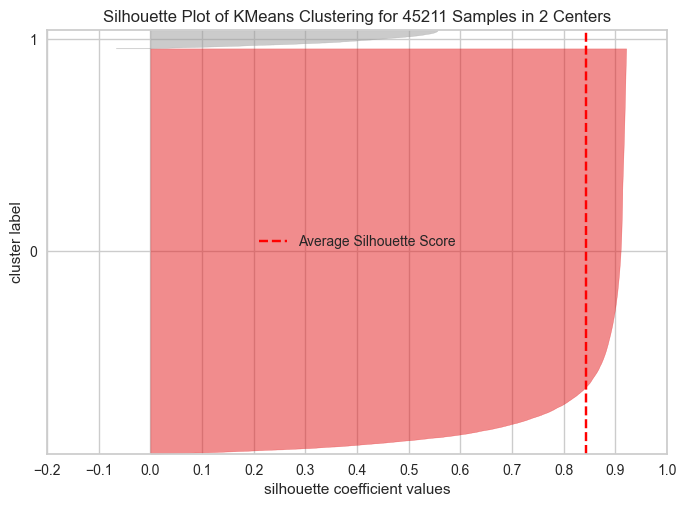

labels:  [0 0 0 ... 0 0 0]
inertia:  201722052413.4383
silhouette score:  0.8431368579948103


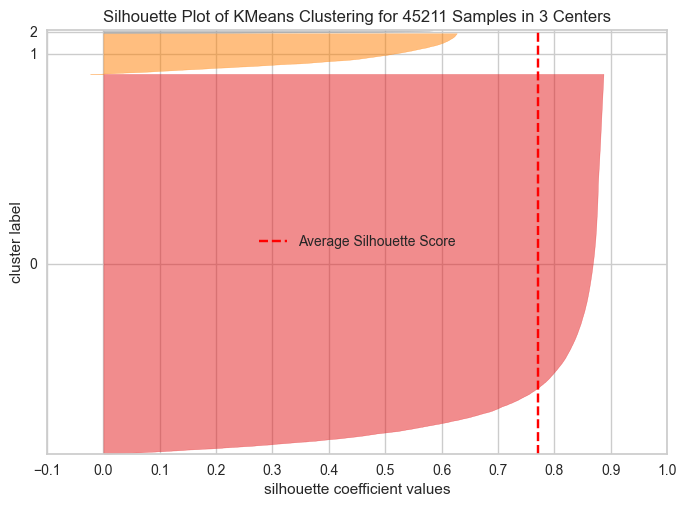

labels:  [0 0 0 ... 1 0 0]
inertia:  113097591496.6315
silhouette score:  0.7715218885423569


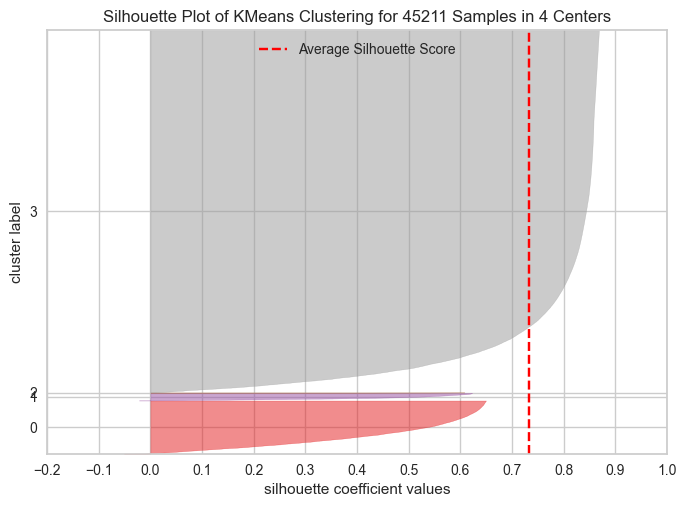

labels:  [3 3 3 ... 0 3 0]
inertia:  73159334561.57852
silhouette score:  0.7334732583514396


In [1]:
# Run both algoriths on a data set of your choice
from ucimlrepo import fetch_ucirepo 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff


  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

X = pd.get_dummies(X)

for k in range(2, 5):

    clf = KMeans(n_clusters=k, n_init=10, init='k-means++')
    visualizer = SilhouetteVisualizer(clf)

    visualizer.fit(X)
    visualizer.show()

    print('labels: ', clf.labels_)
    print('inertia: ', clf.inertia_)
    print('silhouette score: ', silhouette_score(X, clf.labels_))



In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.io import arff
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

X = pd.get_dummies(X)



clf = AgglomerativeClustering(linkage='single', n_clusters=2)
clf.fit(X)

print('score', silhouette_score(X, clf.labels_), '\n')

clf = AgglomerativeClustering(linkage='single', n_clusters=3)
clf.fit(X)

print('score', silhouette_score(X, clf.labels_), '\n')

score 0.9774076577314614 

score 0.9718250375497811 



**Discussion and comparison**  

As you can see from my KMeans cell (above), I plotted the bank_marketing data set with 2, 3, and 4 clusters and graphed the resulting silhouette scores.  

Graphing these results I noticed several important things. First, even with k=3 and k=4, the resulting graphs looked almost identical to k=2. B that I mean that there was one large set of scores and the rest were small. I  think that this makes sense and give us insight into the dataset. Becuase the Groupings didn't significantly change when the k value increased, there is likely a large gap between the clusters of this dataset, making it easy to seperate them with unsupervised learning. Further, comparing the results of the k=2 model to the k=3 and k=4 models, one will notice that the average silhouette score is much higher for k=2. Also, it should be noted that especially in the k=2 model, the shape of the silhouette scores are very good, large round curves, not short spiky curves.  

All things considered, the k-means model did a very good job of seperating the dataset into two clusters. This makes sense because it is only meant to classify two things and the two things are distinctly different, so it did well seperating them.  



2 clusters: 0.9774076577314614  

3 clusters: 0.9718250375497811  


Further, on this same dataset using HAC, I experimented with different numbers of clusters. First, I ran HAC with two clusters and received a silhouette score of 0.9774076577314614. Then, I ran the same model with three clusters to see the impact on the silhouette score and got 0.9718250375497811.  

Looking at these results, it is clear that this model does really well on this dataset according to the silhouette score. Considering that a perfect score is 1.0, geting almost 0.98 is really good. It shows that the datapoints are close together within clusters and clusters a far from one another. Further, it is clear that this dataset only has two output classes and they are very distinct from one another this is why 2 clusters does so well.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm 
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm 

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass